# Linear Regression Lab
## AI308 Machine Learning
### Computer Science Department, Faculty of Computers and Information Sciences
### Mansoura University

---

## Table of Contents
1. [Introduction to Linear Regression](#1-introduction-to-linear-regression)
2. [The Linear Regression Algorithm](#2-the-linear-regression-algorithm)
3. [Mathematical Formulation](#3-mathematical-formulation)
4. [Algorithm Steps](#4-algorithm-steps)
5. [Numerical Example 1: Student Exam Scores](#5-numerical-example-1-student-exam-scores)
6. [Numerical Example 2: House Price Prediction](#6-numerical-example-2-house-price-prediction)
7. [Python Implementation with Scikit-Learn](#7-python-implementation-with-scikit-learn)
8. [Model Evaluation](#8-model-evaluation)
9. [Conclusion and Key Takeaways](#9-conclusion-and-key-takeaways)

---

## 1. Introduction to Linear Regression

**Linear regression** is a fundamental statistical method used to model the relationship between a **dependent variable** (target) and one or more **independent variables** (features). It assumes a linear relationship and finds the best-fitting straight line through the data points.

### Applications:
- **Predicting sales** based on advertising spend
- **Forecasting stock prices**
- **Estimating house prices** based on features
- **Analyzing trends** in time series data

### Why Linear Regression?
- Simple to implement and interpret
- Provides quantitative relationships between variables
- Useful for prediction and trend analysis
- Serves as a foundation for more complex algorithms

## 2. The Linear Regression Algorithm

Linear regression aims to find the **best-fitting line** (or hyperplane in multiple dimensions) that minimizes the difference between predicted and actual values.

### Simple Linear Regression Equation:

$$y = \beta_0 + \beta_1 x$$

Where:
- $y$ = dependent variable (output/target)
- $x$ = independent variable (input/feature)
- $\beta_0$ = y-intercept (bias term)
- $\beta_1$ = slope (coefficient/weight)

### Multiple Linear Regression Equation:

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n$$

In this lab, we'll focus primarily on **Simple Linear Regression**.

## 3. Mathematical Formulation

### Objective: Minimize the Cost Function

The **cost function** (Mean Squared Error - MSE) measures the average squared difference between predicted and actual values:

$$J(\beta_0, \beta_1) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

$$= \frac{1}{n} \sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_i))^2$$

Where:
- $n$ = number of data points
- $y_i$ = actual value
- $\hat{y}_i$ = predicted value

### Normal Equation (Closed-Form Solution)

For simple linear regression, the optimal parameters are:

**Slope:**
$$\beta_1 = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^2} = \frac{Cov(x,y)}{Var(x)}$$

**Intercept:**
$$\beta_0 = \bar{y} - \beta_1 \bar{x}$$

Where:
- $\bar{x}$ = mean of x values
- $\bar{y}$ = mean of y values

## 4. Algorithm Steps

### Step 1: Data Collection and Preparation
- Gather dataset with independent variable(s) $x$ and dependent variable $y$
- Clean data (handle missing values, outliers)
- Organize data in tabular format

### Step 2: Calculate Descriptive Statistics
- Compute mean of $x$: $\bar{x} = \frac{\sum x_i}{n}$
- Compute mean of $y$: $\bar{y} = \frac{\sum y_i}{n}$

### Step 3: Calculate Deviations
For each data point $i$:
- Compute deviation of x from mean: $(x_i - \bar{x})$
- Compute deviation of y from mean: $(y_i - \bar{y})$

### Step 4: Calculate Products and Squares
For each data point $i$:
- Compute product of deviations: $(x_i - \bar{x})(y_i - \bar{y})$
- Compute square of x deviation: $(x_i - \bar{x})^2$

### Step 5: Calculate Slope ($\beta_1$)
$$\beta_1 = \frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{\sum(x_i - \bar{x})^2}$$

### Step 6: Calculate Intercept ($\beta_0$)
$$\beta_0 = \bar{y} - \beta_1 \bar{x}$$

### Step 7: Form the Regression Equation
$$\hat{y} = \beta_0 + \beta_1 x$$

### Step 8: Make Predictions
For any value of $x$, calculate: $\hat{y} = \beta_0 + \beta_1 x$

### Step 9: Evaluate Model Performance
Calculate metrics such as:
- $R^2$ (Coefficient of Determination)
- MSE (Mean Squared Error)
- RMSE (Root Mean Squared Error)

## 5. Numerical Example 1: Student Exam Scores

### Problem Statement
A teacher wants to predict student exam scores based on hours of study. The data for 5 students is:

| Student | Hours Studied (x) | Exam Score (y) |
|---------|-------------------|----------------|
| 1       | 1                 | 2              |
| 2       | 2                 | 4              |
| 3       | 3                 | 5              |
| 4       | 4                 | 4              |
| 5       | 5                 | 5              |

**Task:** Find the linear regression equation and predict the score for a student who studies 6 hours.

### Solution: Following Algorithm Steps

#### Step 1: Data Collection ✓
Data collected and organized in the table above. Number of observations: $n = 5$

#### Step 2: Calculate Descriptive Statistics

**Mean of x (Hours Studied):**
$$\bar{x} = \frac{1 + 2 + 3 + 4 + 5}{5} = \frac{15}{5} = 3$$

**Mean of y (Exam Score):**
$$\bar{y} = \frac{2 + 4 + 5 + 4 + 5}{5} = \frac{20}{5} = 4$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])
n = len(x)

# Calculate means
x_mean = np.mean(x)
y_mean = np.mean(y)

print(f"Mean of x (Hours): {x_mean}")
print(f"Mean of y (Score): {y_mean}")

Mean of x (Hours): 3.0
Mean of y (Score): 4.0


#### Step 3 & 4: Calculate Deviations, Products, and Squares

| i | $x_i$ | $y_i$ | $(x_i - \bar{x})$ | $(y_i - \bar{y})$ | $(x_i - \bar{x})(y_i - \bar{y})$ | $(x_i - \bar{x})^2$ |
|---|-------|-------|-------------------|-------------------|----------------------------------|---------------------|
| 1 | 1     | 2     | -2                | -2                | 4                                | 4                   |
| 2 | 2     | 4     | -1                | 0                 | 0                                | 1                   |
| 3 | 3     | 5     | 0                 | 1                 | 0                                | 0                   |
| 4 | 4     | 4     | 1                 | 0                 | 0                                | 1                   |
| 5 | 5     | 5     | 2                 | 1                 | 2                                | 4                   |
| Σ |       |       |                   |                   | **6**                            | **10**              |

**Calculations:**
- $\sum(x_i - \bar{x})(y_i - \bar{y}) = 4 + 0 + 0 + 0 + 2 = 6$
- $\sum(x_i - \bar{x})^2 = 4 + 1 + 0 + 1 + 4 = 10$

In [2]:
# Calculate deviations
x_dev = x - x_mean
y_dev = y - y_mean

# Calculate products and squares
xy_product = x_dev * y_dev
x_squared = x_dev ** 2

# Create a DataFrame for visualization
df = pd.DataFrame({
    'x_i': x,
    'y_i': y,
    '(x_i - x̄)': x_dev,
    '(y_i - ȳ)': y_dev,
    '(x_i - x̄)(y_i - ȳ)': xy_product,
    '(x_i - x̄)²': x_squared
})

print("\nCalculation Table:")
print(df.to_string(index=False))
print(f"\nΣ(x_i - x̄)(y_i - ȳ) = {np.sum(xy_product)}")
print(f"Σ(x_i - x̄)² = {np.sum(x_squared)}")


Calculation Table:
 x_i  y_i  (x_i - x̄)  (y_i - ȳ)  (x_i - x̄)(y_i - ȳ)  (x_i - x̄)²
   1    2        -2.0       -2.0                  4.0          4.0
   2    4        -1.0        0.0                 -0.0          1.0
   3    5         0.0        1.0                  0.0          0.0
   4    4         1.0        0.0                  0.0          1.0
   5    5         2.0        1.0                  2.0          4.0

Σ(x_i - x̄)(y_i - ȳ) = 6.0
Σ(x_i - x̄)² = 10.0


#### Step 5: Calculate Slope ($\beta_1$)

$$\beta_1 = \frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{\sum(x_i - \bar{x})^2} = \frac{6}{10} = 0.6$$

**Interpretation:** For every additional hour of study, the exam score increases by 0.6 points.

In [3]:
# Calculate slope (beta_1)
beta_1 = np.sum(xy_product) / np.sum(x_squared)
print(f"Slope (β₁) = {beta_1}")
print(f"\nInterpretation: For every additional hour of study, the exam score increases by {beta_1} points.")

Slope (β₁) = 0.6

Interpretation: For every additional hour of study, the exam score increases by 0.6 points.


#### Step 6: Calculate Intercept ($\beta_0$)

$$\beta_0 = \bar{y} - \beta_1 \bar{x} = 4 - (0.6 \times 3) = 4 - 1.8 = 2.2$$

**Interpretation:** A student who studies 0 hours would be expected to score 2.2 points (baseline).

In [4]:
# Calculate intercept (beta_0)
beta_0 = y_mean - beta_1 * x_mean
print(f"Intercept (β₀) = {beta_0}")
print(f"\nInterpretation: A student who studies 0 hours would be expected to score {beta_0} points (baseline).")

Intercept (β₀) = 2.2

Interpretation: A student who studies 0 hours would be expected to score 2.2 points (baseline).


#### Step 7: Form the Regression Equation

$$\hat{y} = \beta_0 + \beta_1 x$$
$$\hat{y} = 2.2 + 0.6x$$

**Final Equation:** $\hat{y} = 2.2 + 0.6x$

In [5]:
print(f"\nRegression Equation: ŷ = {beta_0} + {beta_1}x")
print(f"Or: ŷ = {beta_0} + {beta_1} * (Hours Studied)")


Regression Equation: ŷ = 2.2 + 0.6x
Or: ŷ = 2.2 + 0.6 * (Hours Studied)


#### Step 8: Make Predictions

**Prediction for x = 6 hours:**
$$\hat{y} = 2.2 + 0.6(6) = 2.2 + 3.6 = 5.8$$

**Answer:** A student who studies 6 hours is predicted to score 5.8 points.

In [6]:
# Make prediction for 6 hours
x_new = 6
y_pred_new = beta_0 + beta_1 * x_new
print(f"\nPrediction for {x_new} hours of study: {y_pred_new} points")


Prediction for 6 hours of study: 5.8 points


#### Step 9: Evaluate Model Performance

Calculate predictions for all data points:

| $x_i$ | $y_i$ (Actual) | $\hat{y}_i$ (Predicted) | $(y_i - \hat{y}_i)$ | $(y_i - \hat{y}_i)^2$ |
|-------|----------------|-------------------------|---------------------|------------------------|
| 1     | 2              | 2.8                     | -0.8                | 0.64                   |
| 2     | 4              | 3.4                     | 0.6                 | 0.36                   |
| 3     | 5              | 4.0                     | 1.0                 | 1.00                   |
| 4     | 4              | 4.6                     | -0.6                | 0.36                   |
| 5     | 5              | 5.2                     | -0.2                | 0.04                   |
| Σ     |                |                         |                     | **2.40**               |

In [7]:
# Calculate predictions for all data points
y_pred = beta_0 + beta_1 * x

# Calculate residuals
residuals = y - y_pred
residuals_squared = residuals ** 2

# Create evaluation DataFrame
eval_df = pd.DataFrame({
    'x_i': x,
    'y_i (Actual)': y,
    'ŷ_i (Predicted)': y_pred,
    '(y_i - ŷ_i)': residuals,
    '(y_i - ŷ_i)²': residuals_squared
})

print("\nEvaluation Table:")
print(eval_df.to_string(index=False))
print(f"\nΣ(y_i - ŷ_i)² = {np.sum(residuals_squared)}")


Evaluation Table:
 x_i  y_i (Actual)  ŷ_i (Predicted)  (y_i - ŷ_i)  (y_i - ŷ_i)²
   1             2              2.8         -0.8          0.64
   2             4              3.4          0.6          0.36
   3             5              4.0          1.0          1.00
   4             4              4.6         -0.6          0.36
   5             5              5.2         -0.2          0.04

Σ(y_i - ŷ_i)² = 2.3999999999999995


#### Mean Squared Error (MSE):
$$MSE = \frac{\sum(y_i - \hat{y}_i)^2}{n} = \frac{2.40}{5} = 0.48$$

#### Root Mean Squared Error (RMSE):
$$RMSE = \sqrt{MSE} = \sqrt{0.48} \approx 0.69$$

In [8]:
# Calculate MSE and RMSE
mse = np.sum(residuals_squared) / n
rmse = np.sqrt(mse)

print(f"\nMean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Squared Error (MSE): 0.47999999999999987
Root Mean Squared Error (RMSE): 0.69


#### Calculate $R^2$ (Coefficient of Determination):

**First, calculate Total Sum of Squares (SST):**
$$SST = \sum(y_i - \bar{y})^2 = (-2)^2 + 0^2 + 1^2 + 0^2 + 1^2 = 4 + 0 + 1 + 0 + 1 = 6$$

**Sum of Squared Residuals (SSR):**
$$SSR = \sum(y_i - \hat{y}_i)^2 = 2.40$$

**$R^2$ Calculation:**
$$R^2 = 1 - \frac{SSR}{SST} = 1 - \frac{2.40}{6} = 1 - 0.4 = 0.6$$

**Interpretation:** The model explains 60% of the variance in exam scores based on study hours.

In [9]:
# Calculate R²
sst = np.sum((y - y_mean) ** 2)
ssr = np.sum(residuals_squared)
r_squared = 1 - (ssr / sst)

print(f"\nTotal Sum of Squares (SST): {sst}")
print(f"Sum of Squared Residuals (SSR): {ssr}")
print(f"R² (Coefficient of Determination): {r_squared}")
print(f"\nInterpretation: The model explains {r_squared*100:.0f}% of the variance in exam scores.")


Total Sum of Squares (SST): 6.0
Sum of Squared Residuals (SSR): 2.3999999999999995
R² (Coefficient of Determination): 0.6000000000000001

Interpretation: The model explains 60% of the variance in exam scores.


### Visualization of the Results

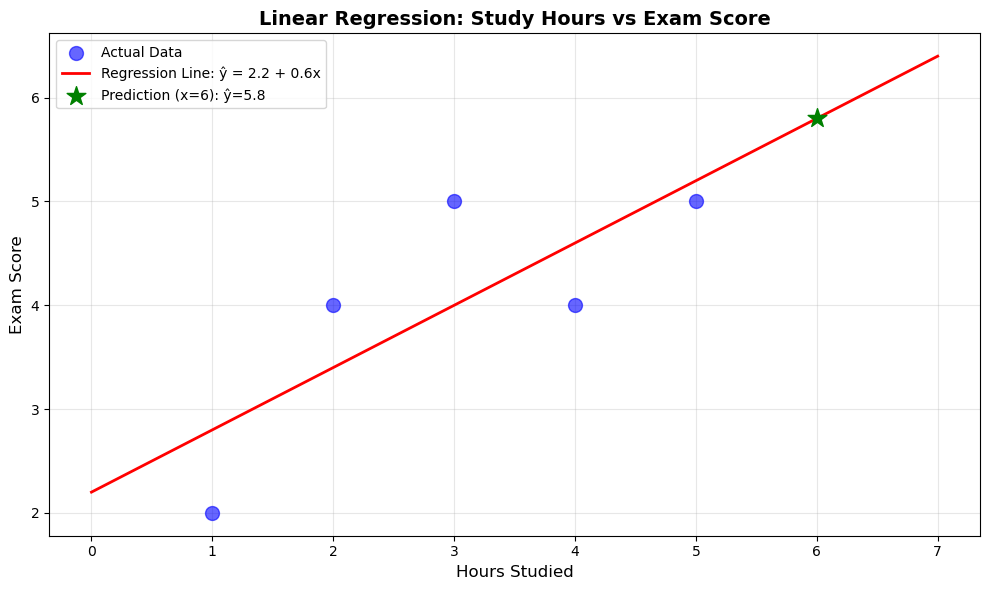


SUMMARY OF EXAMPLE 1
Equation: ŷ = 2.2 + 0.6x
R²: 0.6000
MSE: 0.4800
RMSE: 0.6928
Prediction for 6 hours: 5.8 points


In [10]:
# Visualization
plt.figure(figsize=(10, 6))

# Plot actual data points
plt.scatter(x, y, color='blue', s=100, alpha=0.6, label='Actual Data', zorder=3)

# Plot regression line
x_line = np.linspace(0, 7, 100)
y_line = beta_0 + beta_1 * x_line
plt.plot(x_line, y_line, color='red', linewidth=2, label=f'Regression Line: ŷ = {beta_0} + {beta_1}x')

# Plot prediction for 6 hours
plt.scatter([x_new], [y_pred_new], color='green', s=200, marker='*', 
            label=f'Prediction (x={x_new}): ŷ={y_pred_new}', zorder=4)

# Formatting
plt.xlabel('Hours Studied', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.title('Linear Regression: Study Hours vs Exam Score', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary
print("\n" + "="*50)
print("SUMMARY OF EXAMPLE 1")
print("="*50)
print(f"Equation: ŷ = {beta_0} + {beta_1}x")
print(f"R²: {r_squared:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"Prediction for {x_new} hours: {y_pred_new} points")
print("="*50)

## 6. Numerical Example 2: House Price Prediction

### Problem Statement
Predict house prices based on size (in square feet).

**Sample Data:**

| House Size (sq ft) | Price ($1000s) |
|--------------------|----------------|
| 800                | 140            |
| 1200               | 210            |
| 1500               | 280            |
| 1800               | 350            |
| 2200               | 420            |

In [11]:
# House price data
house_size = np.array([800, 1200, 1500, 1800, 2200])
house_price = np.array([140, 210, 280, 350, 420])

# Calculate parameters manually
n_houses = len(house_size)
x_mean_house = np.mean(house_size)
y_mean_house = np.mean(house_price)

# Deviations
x_dev_house = house_size - x_mean_house
y_dev_house = house_price - y_mean_house

# Calculate slope and intercept
beta_1_house = np.sum(x_dev_house * y_dev_house) / np.sum(x_dev_house ** 2)
beta_0_house = y_mean_house - beta_1_house * x_mean_house

print("House Price Prediction Model")
print("="*50)
print(f"Slope (β₁): {beta_1_house:.4f}")
print(f"Intercept (β₀): {beta_0_house:.2f}")
print(f"\nEquation: Price = {beta_0_house:.2f} + {beta_1_house:.4f} × Size")
print(f"\nInterpretation: For every additional square foot, the price increases by ${beta_1_house*1000:.2f}")

House Price Prediction Model
Slope (β₁): 0.2052
Intercept (β₀): -27.76

Equation: Price = -27.76 + 0.2052 × Size

Interpretation: For every additional square foot, the price increases by $205.17


In [12]:
# Make predictions
y_pred_house = beta_0_house + beta_1_house * house_size

# Calculate metrics
residuals_house = house_price - y_pred_house
mse_house = np.mean(residuals_house ** 2)
rmse_house = np.sqrt(mse_house)
sst_house = np.sum((house_price - y_mean_house) ** 2)
ssr_house = np.sum(residuals_house ** 2)
r2_house = 1 - (ssr_house / sst_house)

print(f"\nModel Performance:")
print(f"R²: {r2_house:.4f}")
print(f"MSE: {mse_house:.2f}")
print(f"RMSE: {rmse_house:.2f}")

# Predict for a new house
new_house_size = 2000
predicted_price = beta_0_house + beta_1_house * new_house_size
print(f"\nPrediction for {new_house_size} sq ft house: ${predicted_price:.2f}k")


Model Performance:
R²: 0.9966
MSE: 33.79
RMSE: 5.81

Prediction for 2000 sq ft house: $382.59k


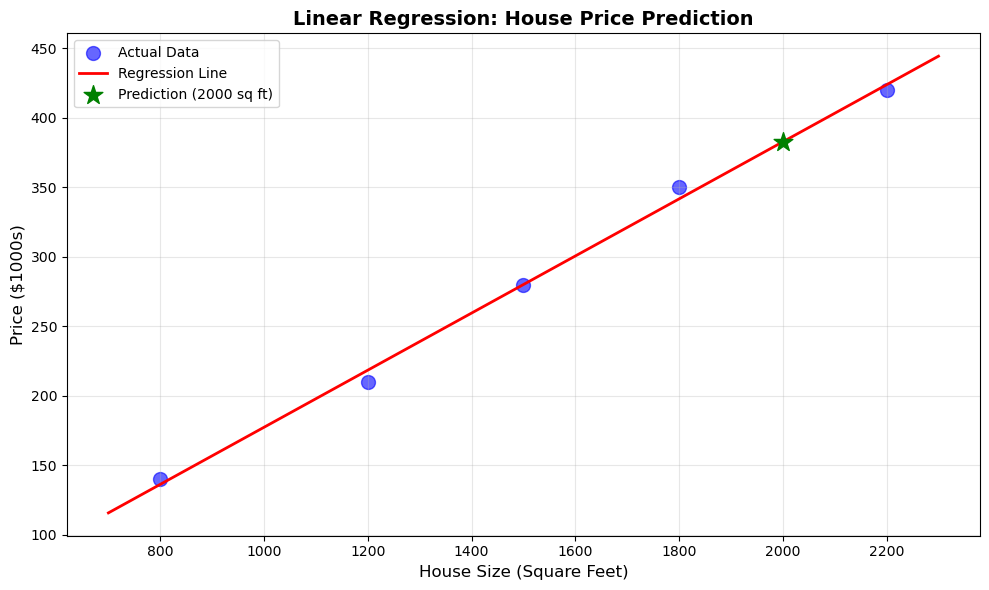


Residuals (Actual - Predicted):
  House 1: Size=800 sq ft, Actual=$140k, Predicted=$136.38k, Residual=$3.62k
  House 2: Size=1200 sq ft, Actual=$210k, Predicted=$218.45k, Residual=$-8.45k
  House 3: Size=1500 sq ft, Actual=$280k, Predicted=$280.00k, Residual=$0.00k
  House 4: Size=1800 sq ft, Actual=$350k, Predicted=$341.55k, Residual=$8.45k
  House 5: Size=2200 sq ft, Actual=$420k, Predicted=$423.62k, Residual=$-3.62k


In [13]:
# Visualization
plt.figure(figsize=(10, 6))

# Plot actual data
plt.scatter(house_size, house_price, color='blue', s=100, alpha=0.6, label='Actual Data')

# Plot regression line
x_line_house = np.linspace(700, 2300, 100)
y_line_house = beta_0_house + beta_1_house * x_line_house
plt.plot(x_line_house, y_line_house, color='red', linewidth=2, 
         label=f'Regression Line')

# Plot prediction
plt.scatter([new_house_size], [predicted_price], color='green', s=200, marker='*',
            label=f'Prediction ({new_house_size} sq ft)', zorder=4)

# Formatting
plt.xlabel('House Size (Square Feet)', fontsize=12)
plt.ylabel('Price ($1000s)', fontsize=12)
plt.title('Linear Regression: House Price Prediction', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Show residuals
print(f"\nResiduals (Actual - Predicted):")
for i, (size, actual, pred, resid) in enumerate(zip(house_size, house_price, y_pred_house, residuals_house), 1):
    print(f"  House {i}: Size={size} sq ft, Actual=${actual}k, Predicted=${pred:.2f}k, Residual=${resid:.2f}k")

## 7. Python Implementation with Scikit-Learn

Now let's implement the same examples using **scikit-learn**, Python's most popular machine learning library.

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Example 1: Student Exam Scores with scikit-learn
print("="*60)
print("EXAMPLE 1: STUDENT EXAM SCORES (Scikit-Learn Implementation)")
print("="*60)

# Reshape data (scikit-learn requires 2D array for X)
X_study = x.reshape(-1, 1) # from [1,2,3,4,5] to [ [1],[2],[3],[4],[5] ] => From shape (5,) to shape (5, 1)
y_study = y

# Create and fit the model
model_study = LinearRegression()
model_study.fit(X_study, y_study)

# Get parameters
slope_study = model_study.coef_[0]
intercept_study = model_study.intercept_

print(f"\nEquation: y = {intercept_study:.2f} + {slope_study:.2f}x")
print(f"Slope (β₁): {slope_study:.2f}")
print(f"Intercept (β₀): {intercept_study:.2f}")

# Make predictions
y_pred_sklearn = model_study.predict(X_study)

# Calculate metrics
r2_sklearn = r2_score(y_study, y_pred_sklearn)
mse_sklearn = mean_squared_error(y_study, y_pred_sklearn)
rmse_sklearn = np.sqrt(mse_sklearn)

print(f"\nModel Performance:")
print(f"R-squared: {r2_sklearn:.4f}")
print(f"Mean Squared Error: {mse_sklearn:.4f}")
print(f"Root Mean Squared Error: {rmse_sklearn:.4f}")

# Make prediction for new data
new_hours = 6
predicted_score = model_study.predict([[new_hours]])[0]
print(f"\nPrediction for {new_hours} hours: {predicted_score:.2f} points")

EXAMPLE 1: STUDENT EXAM SCORES (Scikit-Learn Implementation)

Equation: y = 2.20 + 0.60x
Slope (β₁): 0.60
Intercept (β₀): 2.20

Model Performance:
R-squared: 0.6000
Mean Squared Error: 0.4800
Root Mean Squared Error: 0.6928

Prediction for 6 hours: 5.80 points


In [15]:
# Example 2: House Prices with scikit-learn
print("\n" + "="*60)
print("EXAMPLE 2: HOUSE PRICE PREDICTION (Scikit-Learn Implementation)")
print("="*60)

# Reshape data
X_house = house_size.reshape(-1, 1)
y_house = house_price

# Create and fit the model
model_house = LinearRegression()
model_house.fit(X_house, y_house)

# Get parameters
slope_house_sklearn = model_house.coef_[0]
intercept_house_sklearn = model_house.intercept_

print(f"\nEquation: y = {intercept_house_sklearn:.2f} + {slope_house_sklearn:.4f}x")
print(f"Slope (β₁): {slope_house_sklearn:.4f}")
print(f"Intercept (β₀): {intercept_house_sklearn:.2f}")

# Make predictions
y_pred_house_sklearn = model_house.predict(X_house)

# Calculate metrics
r2_house_sklearn = r2_score(y_house, y_pred_house_sklearn)
mse_house_sklearn = mean_squared_error(y_house, y_pred_house_sklearn)
rmse_house_sklearn = np.sqrt(mse_house_sklearn)

print(f"\nModel Performance:")
print(f"R-squared: {r2_house_sklearn:.4f}")
print(f"Mean Squared Error: {mse_house_sklearn:.2f}")
print(f"Root Mean Squared Error: {rmse_house_sklearn:.2f}")

# Make prediction for new data
new_size = 2000
predicted_price_sklearn = model_house.predict([[new_size]])[0]
print(f"\nPrediction for {new_size} sq ft house: ${predicted_price_sklearn:.2f}k")


EXAMPLE 2: HOUSE PRICE PREDICTION (Scikit-Learn Implementation)

Equation: y = -27.76 + 0.2052x
Slope (β₁): 0.2052
Intercept (β₀): -27.76

Model Performance:
R-squared: 0.9966
Mean Squared Error: 33.79
Root Mean Squared Error: 5.81

Prediction for 2000 sq ft house: $382.59k


### Side-by-Side Comparison: Manual vs Scikit-Learn

In [16]:
# Comparison table
comparison_data = {
    'Metric': ['Slope (β₁)', 'Intercept (β₀)', 'R²', 'MSE', 'RMSE'],
    'Manual Calculation': [
        f"{beta_1:.4f}",
        f"{beta_0:.4f}",
        f"{r_squared:.4f}",
        f"{mse:.4f}",
        f"{rmse:.4f}"
    ],
    'Scikit-Learn': [
        f"{slope_study:.4f}",
        f"{intercept_study:.4f}",
        f"{r2_sklearn:.4f}",
        f"{mse_sklearn:.4f}",
        f"{rmse_sklearn:.4f}"
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("\n" + "="*60)
print("COMPARISON: Manual Calculation vs Scikit-Learn")
print("(Example 1: Student Exam Scores)")
print("="*60)
print(comparison_df.to_string(index=False))
print("\nNote: Both methods produce identical results!")


COMPARISON: Manual Calculation vs Scikit-Learn
(Example 1: Student Exam Scores)
        Metric Manual Calculation Scikit-Learn
    Slope (β₁)             0.6000       0.6000
Intercept (β₀)             2.2000       2.2000
            R²             0.6000       0.6000
           MSE             0.4800       0.4800
          RMSE             0.6928       0.6928

Note: Both methods produce identical results!


## 8. Model Evaluation

### Key Performance Metrics

#### 1. Mean Squared Error (MSE)
$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$

- Measures average squared difference between actual and predicted values
- Lower values indicate better fit
- Sensitive to outliers (due to squaring)

#### 2. Root Mean Squared Error (RMSE)
$$RMSE = \sqrt{MSE}$$

- Same units as the target variable
- Easier to interpret than MSE
- Represents typical prediction error

#### 3. Coefficient of Determination ($R^2$)
$$R^2 = 1 - \frac{\sum(y_i - \hat{y}_i)^2}{\sum(y_i - \bar{y})^2} = 1 - \frac{SSR}{SST}$$

- Ranges from 0 to 1 (can be negative for very poor models)
- Represents proportion of variance explained by the model
- $R^2 = 0.6$ means model explains 60% of variance
- Higher values indicate better fit

In [17]:
# Comprehensive evaluation function
def evaluate_regression_model(y_true, y_pred, model_name="Model"):
    """
    Evaluate regression model performance with multiple metrics
    """
    # Calculate metrics
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    # Calculate additional metrics
    mae = np.mean(np.abs(y_true - y_pred))  # Mean Absolute Error
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error
    
    print(f"\n{'='*60}")
    print(f"EVALUATION METRICS: {model_name}")
    print(f"{'='*60}")
    print(f"R² (Coefficient of Determination): {r2:.4f}")
    print(f"Mean Squared Error (MSE):          {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE):    {rmse:.4f}")
    print(f"Mean Absolute Error (MAE):         {mae:.4f}")
    print(f"Mean Absolute Percentage Error:    {mape:.2f}%")
    print(f"{'='*60}")
    
    return {'R2': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'MAPE': mape}

# Evaluate both models
metrics_study = evaluate_regression_model(y, y_pred_sklearn, "Student Exam Scores")
metrics_house = evaluate_regression_model(house_price, y_pred_house_sklearn, "House Price Prediction")


EVALUATION METRICS: Student Exam Scores
R² (Coefficient of Determination): 0.6000
Mean Squared Error (MSE):          0.4800
Root Mean Squared Error (RMSE):    0.6928
Mean Absolute Error (MAE):         0.6400
Mean Absolute Percentage Error:    18.80%

EVALUATION METRICS: House Price Prediction
R² (Coefficient of Determination): 0.9966
Mean Squared Error (MSE):          33.7931
Root Mean Squared Error (RMSE):    5.8132
Mean Absolute Error (MAE):         4.8276
Mean Absolute Percentage Error:    1.98%


### Residual Analysis

Analyzing residuals (errors) helps validate model assumptions:
- Residuals should be randomly distributed
- No clear patterns in residual plots
- Roughly constant variance (homoscedasticity)

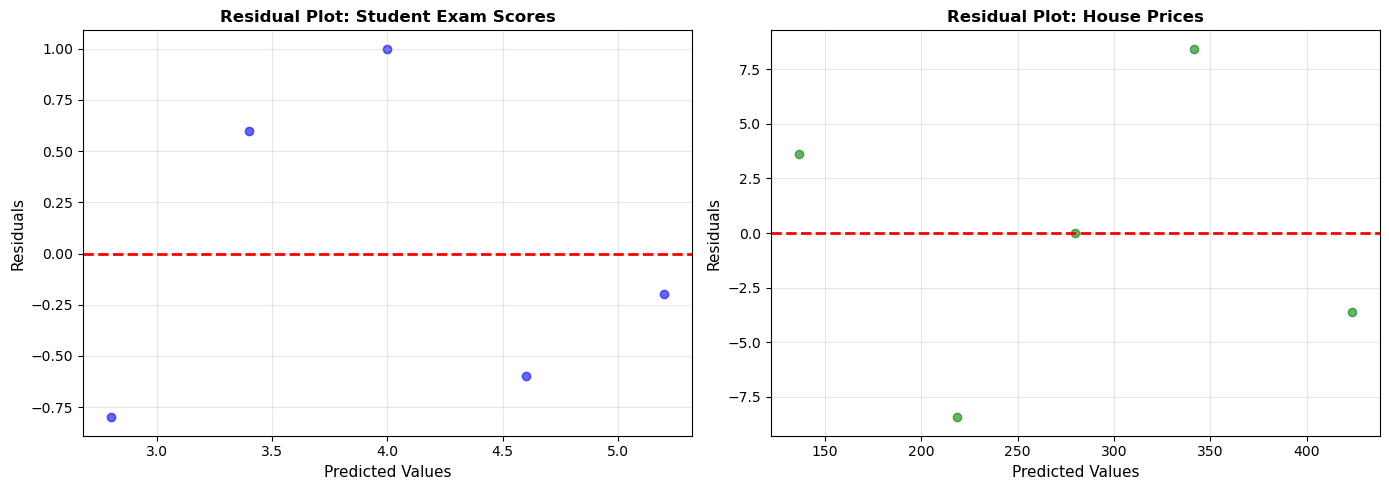


Residual Analysis:
- Points randomly scattered around zero line indicate good model fit
- Patterns in residuals suggest model assumptions may be violated
- Consistent spread indicates homoscedasticity (constant variance)


In [18]:
# Residual plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Residual plot for Example 1
residuals_1 = y - y_pred_sklearn
axes[0].scatter(y_pred_sklearn, residuals_1, color='blue', alpha=0.6)
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel('Predicted Values', fontsize=11)
axes[0].set_ylabel('Residuals', fontsize=11)
axes[0].set_title('Residual Plot: Student Exam Scores', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Residual plot for Example 2
residuals_2 = house_price - y_pred_house_sklearn
axes[1].scatter(y_pred_house_sklearn, residuals_2, color='green', alpha=0.6)
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Values', fontsize=11)
axes[1].set_ylabel('Residuals', fontsize=11)
axes[1].set_title('Residual Plot: House Prices', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nResidual Analysis:")
print("- Points randomly scattered around zero line indicate good model fit")
print("- Patterns in residuals suggest model assumptions may be violated")
print("- Consistent spread indicates homoscedasticity (constant variance)")

## 9. Conclusion and Key Takeaways

### Summary

Linear regression is a powerful and interpretable method for modeling relationships between variables. The algorithm follows clear mathematical steps:

1. **Calculate means** of independent and dependent variables
2. **Compute deviations** from the mean
3. **Calculate slope** from covariance and variance
4. **Calculate intercept** using means and slope
5. **Form prediction equation**
6. **Evaluate performance** using appropriate metrics

### Key Takeaways:

✓ **Simple to implement and interpret** - Linear regression provides clear, actionable insights

✓ **Provides quantitative relationships** - Coefficients show the exact impact of features

✓ **Useful for prediction and trend analysis** - Effective for forecasting and understanding patterns

✓ **Performance depends on data quality** - Clean data and linear relationships are essential

✓ **Always validate assumptions** - Check for linearity, independence, and constant variance

✓ **Evaluate model performance** - Use multiple metrics (R², MSE, RMSE) to assess quality

### When to Use Linear Regression:

**Good fit when:**
- Relationship between variables is approximately linear
- You need interpretable results
- Data has minimal outliers
- Features are independent

**Not suitable when:**
- Relationships are highly non-linear
- Data has many outliers
- Features are highly correlated (multicollinearity)
- Need to capture complex interactions

### Next Steps:

- Explore **Multiple Linear Regression** (multiple features)
- Learn about **Polynomial Regression** for non-linear relationships
- Study **Regularization techniques** (Ridge, Lasso) for better generalization
- Practice with real-world datasets

---

## Practice Exercises

Try these exercises to reinforce your understanding:

### Exercise 1: Temperature Conversion
Build a linear regression model to convert Celsius to Fahrenheit using this data:
- Celsius: [0, 10, 20, 30, 40]
- Fahrenheit: [32, 50, 68, 86, 104]

### Exercise 2: Age and Height
Predict height based on age using this dataset:
- Age (years): [2, 4, 6, 8, 10]
- Height (cm): [85, 100, 115, 130, 140]

### Exercise 3: Sales Prediction
Predict sales based on advertising spend:
- Ad Spend ($1000s): [1, 2, 3, 4, 5]
- Sales ($1000s): [10, 25, 35, 48, 55]

For each exercise:
1. Calculate slope and intercept manually
2. Verify using scikit-learn
3. Make predictions for new values
4. Evaluate model performance
5. Create visualizations

In [19]:
# Space for your practice exercises
# Exercise 1: Temperature Conversion

# Your code here...


In [20]:
# Exercise 2: Age and Height

# Your code here...


In [21]:
# Exercise 3: Sales Prediction

# Your code here...


---

## References and Further Reading

- Scikit-learn Documentation: [Linear Regression](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)
- Machine Learning concepts and algorithms
- Statistical Learning Theory

---

**End of Lab**